In [ ]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import os

In [ ]:
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)

    return undist

In [ ]:
def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

In [ ]:
def calibrate_camera(calibration_folder):

    #Initialize object and image points
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = []
    images = glob.glob(calibration_folder)
    for fname in images:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)
    return  objpoints, imgpoints

In [ ]:
def magnitude_thresh(img, mag_thresh):
    img = np.copy(img)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = gaussian_blur(gray, 5)
    
    #magnitude
    abs_sobel_x = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=11))
    abs_sobel_y = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=11))
    abs_sobelxy = np.sqrt((abs_sobel_x * abs_sobel_x)+(abs_sobel_y * abs_sobel_y))
    scaled_mag = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    mag_binary = np.zeros_like(scaled_mag)
    mag_binary[(scaled_mag >= mag_thresh[0]) & (scaled_mag <= mag_thresh[1])] = 1
    
    return mag_binary

In [ ]:
def channel_threshold_LUV(img,threshold_range):
    
    l_channel_luv = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)[:,:,0]

    
    l_binary = np.zeros_like(l_channel_luv)
    l_binary[(l_channel_luv >= threshold_range[0]) & (l_channel_luv <= threshold_range[1])] = 1
    
    return l_binary

In [ ]:
def channel_threshold_YCrCb(img,threshold_range):
    brightYCB = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)[:,:,0]
    
    ycrcb_binary = np.zeros_like(brightYCB)
    ycrcb_binary[(brightYCB >= threshold_range[0]) & (brightYCB <= threshold_range[1])] = 1
    
    return ycrcb_binary

In [ ]:
def channel_threshold_LAB(img,threshold_range):
    
    b_channel_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)[:,:,2]
        
    b_binary = np.zeros_like(b_channel_lab)
    b_binary[(b_channel_lab >= threshold_range[0]) & (b_channel_lab <= threshold_range[1])] = 1
    
    return b_binary

In [ ]:
def sobel_output(img, s_thresh):
    img = np.copy(img)
    
        # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    
    
    abs_sobel_x = np.absolute(cv2.Sobel(s_channel, cv2.CV_64F, 0, 1, ksize=7))
    scaled_sobel = np.uint8(255*abs_sobel_x/np.max(abs_sobel_x))
    
    sobel_binary = np.zeros_like(scaled_sobel)
    sobel_binary[(scaled_sobel >= s_thresh[0]) & (scaled_sobel <= s_thresh[1])] = 1

    return sobel_binary

In [ ]:

calibration_folder ='camera_cal/calibration*.jpg'
objpoints, imgpoints = calibrate_camera(calibration_folder)


In [ ]:
folder = "test_images/"
image_list = os.listdir(folder)
for i, image in enumerate(image_list):
    image_file = os.path.join(folder, image)
    img = cv2.imread(image_file)

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    undistorted = cal_undistort(img, objpoints, imgpoints)
    ax1.set_title('Original Image - '+ image, fontsize=15)
    ax2.imshow(cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB))
    ax2.set_title('Undistorted Image', fontsize=15)
    #result = pipeline1(undistorted, s_thresh=(150, 255), sobel_x_thresh=(100, 250), mag_thresh= (50,255))
    result = magnitude_thresh(undistorted, mag_thresh= (50,255))
    #ax3.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    ax3.imshow(result, cmap = 'gray')
    ax3.set_title('Magnitude Threshold', fontsize=15)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
folder = "test_images/"
image_list = os.listdir(folder)
for i, image in enumerate(image_list):
    image_file = os.path.join(folder, image)
    img = cv2.imread(image_file)

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    undistorted = cal_undistort(img, objpoints, imgpoints)
    ax1.set_title('Original Image - '+ image, fontsize=15)
    ax2.imshow(cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB))
    ax2.set_title('Undistorted Image', fontsize=15)
    result = sobel_output(undistorted, s_thresh=(100, 255))
    #ax3.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    ax3.imshow(result, cmap = 'gray')
    ax3.set_title('Sobel Output', fontsize=15)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
folder = "test_images/"
image_list = os.listdir(folder)
for i, image in enumerate(image_list):
    image_file = os.path.join(folder, image)
    img = cv2.imread(image_file)

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    undistorted = cal_undistort(img, objpoints, imgpoints)
    ax1.set_title('Original Image - '+ image, fontsize=15)
    ax2.imshow(cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB))
    ax2.set_title('Undistorted Image', fontsize=15)
    result = channel_threshold_YCrCb(undistorted, (220,255))
    #ax3.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    ax3.imshow(result, cmap = 'gray')
    ax3.set_title('YCrCb Output', fontsize=15)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
folder = "test_images/"
image_list = os.listdir(folder)
for i, image in enumerate(image_list):
    image_file = os.path.join(folder, image)
    img = cv2.imread(image_file)

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    undistorted = cal_undistort(img, objpoints, imgpoints)
    ax1.set_title('Original Image - '+ image, fontsize=15)
    ax2.imshow(cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB))
    ax2.set_title('Undistorted Image', fontsize=15)
    result = channel_threshold_LUV(undistorted, (215,255))
    #ax3.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    ax3.imshow(result, cmap = 'gray')
    ax3.set_title('LUV Output', fontsize=15)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
folder = "test_images/"
image_list = os.listdir(folder)
for i, image in enumerate(image_list):
    image_file = os.path.join(folder, image)
    img = cv2.imread(image_file)

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    undistorted = cal_undistort(img, objpoints, imgpoints)
    ax1.set_title('Original Image - '+ image, fontsize=15)
    ax2.imshow(cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB))
    ax2.set_title('Undistorted Image', fontsize=15)
    result = channel_threshold_LAB(undistorted, (160,215))
    #ax3.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    ax3.imshow(result, cmap = 'gray')
    ax3.set_title('LAB Output', fontsize=15)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
folder = "test_images/"
image_list = os.listdir(folder)
for i, image in enumerate(image_list):
    image_file = os.path.join(folder, image)
    img = cv2.imread(image_file)

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    undistorted = cal_undistort(img, objpoints, imgpoints)
    ax1.set_title('Original Image - '+ image, fontsize=15)
    ax2.imshow(cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB))
    ax2.set_title('Undistorted Image', fontsize=15)
    result_lab = channel_threshold_LAB(undistorted, (160,215))
    result_luv = channel_threshold_LUV(undistorted, (215,255))
    pipeline_output = np.zeros_like(result_lab)
    pipeline_output[(result_lab == 1) | (result_luv == 1)] = 1
    
    ax3.imshow(pipeline_output, cmap = 'gray')
    ax3.set_title('Thresholded Output', fontsize=15)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    

In [ ]:
def transform_prespective(img):
    img_size = (img.shape[1], img.shape[0])
    src1 = (592, 450)         # top right
    scr2 = (180, img.shape[0])      # bottom left
    src3 = (1130, img.shape[0])     # bottom right
    src4 = (687, 450)         # top left
    src_points = np.array([[src1, scr2, src3, src4]]).astype('float32')

    # Destination points: 800x720 rectangle - (width, height)
    dst1 = (240, 0)           # top right
    dst2 = (240, img.shape[0])      # bottom left
    dst3 = (1040, img.shape[0])     # bottom right
    dst4 = (1040, 0)          # top left 
    dst_points = np.array([[dst1, dst2, dst3, dst4]]).astype('float32')
    M = cv2.getPerspectiveTransform(src_points, dst_points)
    Minv = cv2.getPerspectiveTransform(dst_points, src_points)
    return cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR),Minv

In [ ]:
 
def preprocessing_video(img):
    
    #undistort
    undistorted = cal_undistort(img, objpoints, imgpoints)
    
    #threshold
    result_lab = channel_threshold_LAB(undistorted, (160,215))
    result_luv = channel_threshold_LUV(undistorted, (215,255))
    pipeline_output = np.zeros_like(result_lab)
    pipeline_output[(result_lab == 1) | (result_luv == 1)] = 1
    
    #warp image
    
    warped_image = transform_prespective(pipeline_output)
    
    return warped_image

In [ ]:
def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 10
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 2

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
#         cv2.rectangle(out_img,(win_xleft_low,win_y_low),
#         (win_xleft_high,win_y_high),(0,255,0), 2) 
#         cv2.rectangle(out_img,(win_xright_low,win_y_low),
#         (win_xright_high,win_y_high),(0,255,0), 2) 
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]

        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    
    left_curverad, right_curverad = calc_curve(leftx,lefty,rightx,righty )
    
    #find offset
    center_offset = calc_offset(binary_warped, left_fitx,right_fitx)

    return out_img,left_curverad, right_curverad, center_offset,left_fit, right_fit

In [ ]:
def calc_offset(binary_warped,left_fitx,right_fitx):
    offset = binary_warped.shape[1]/2 - (left_fitx + right_fitx)/2
    
  # meters per pixel in x dimension
    offset = offset * 3.7/700
    return offset

In [ ]:
def calc_curve(leftx,lefty,rightx,righty):


    y_eval = 719  # 720p video/image, so last (lowest on screen) y index is 719

# Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension



# Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters

















    return left_curverad, right_curverad

In [100]:
def final_viz(undist, left_fit, right_fit, m_inv, left_curve, right_curve, vehicle_offset):

    # Generate x and y values for plotting
    ploty = np.linspace(0, undist.shape[0]-1, undist.shape[0])
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Create an image to draw the lines on
    #warp_zero = np.zeros_like(warped).astype(np.uint8)
    #color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    color_warp = np.zeros((720, 1280, 3), dtype='uint8')  # NOTE: Hard-coded image dimensions

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, m_inv, (undist.shape[1], undist.shape[0]))
    # Combine the result with the original image
    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)

    # Annotate lane curvature values and vehicle offset from center
    avg_curve = (left_curve + right_curve)/2
    label_str = 'Radius of curvature: %.1f m ' + str(avg_curve)
    result = cv2.putText(result, label_str, (30,40), 0, 1, (0,0,0), 2, cv2.LINE_AA)

    label_str = 'Vehicle offset from lane center: %.1f m'+ str(vehicle_offset)
    result = cv2.putText(result, label_str, (30,70), 0, 1, (0,0,0), 2, cv2.LINE_AA)

    return result

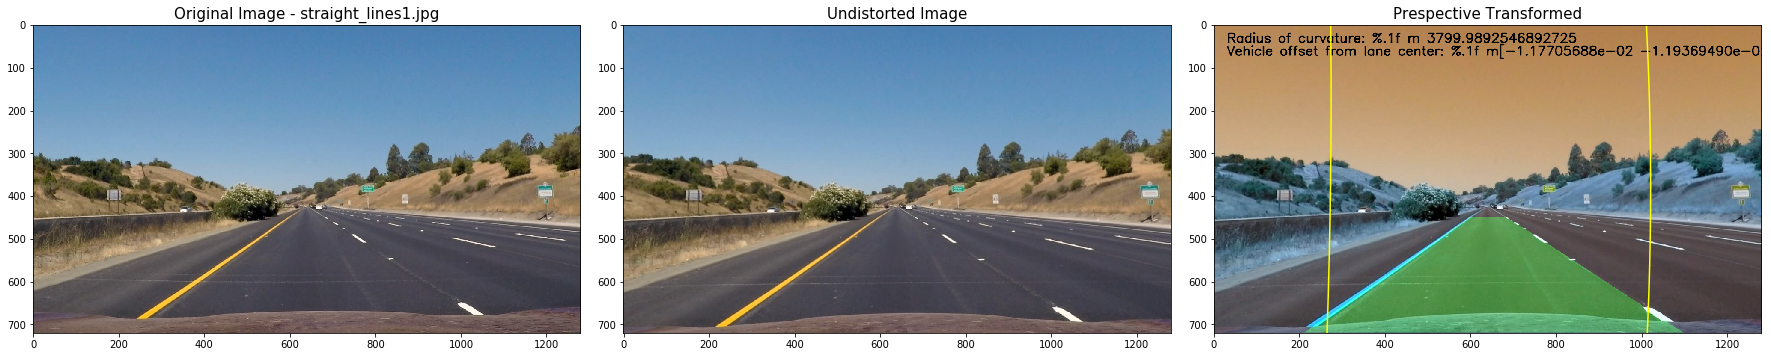

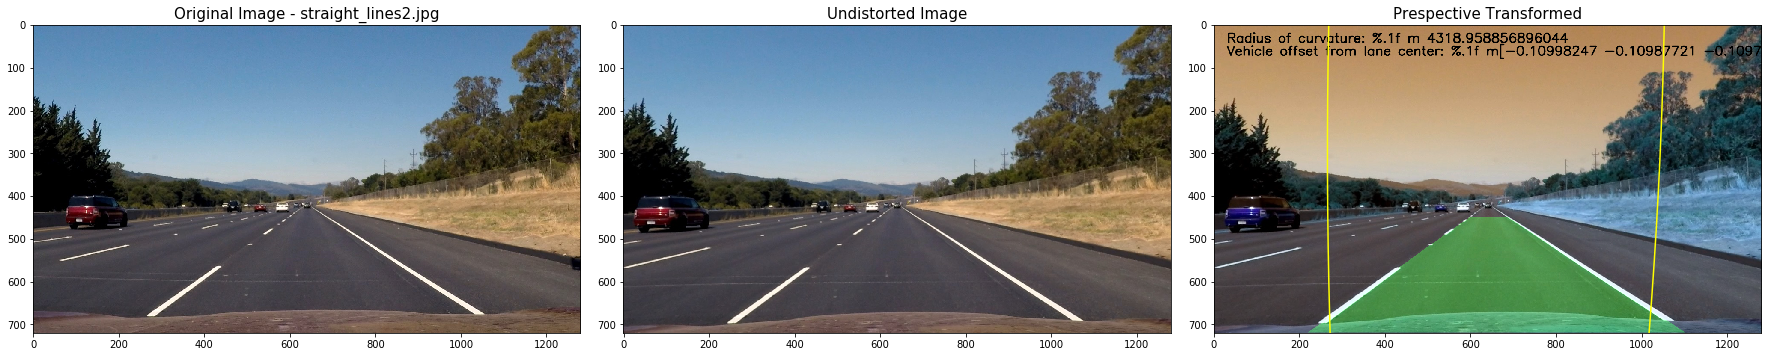

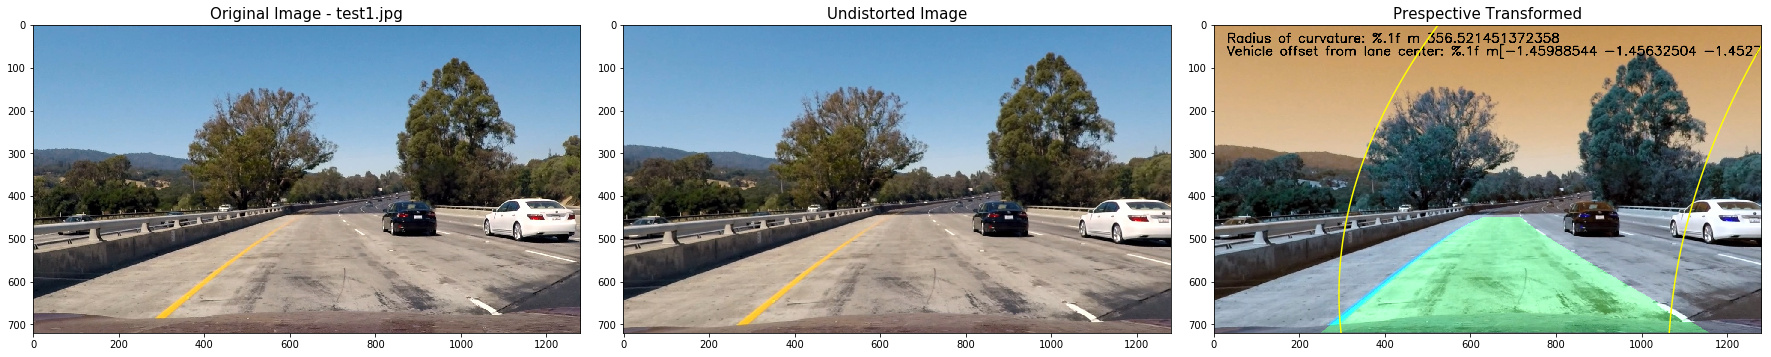

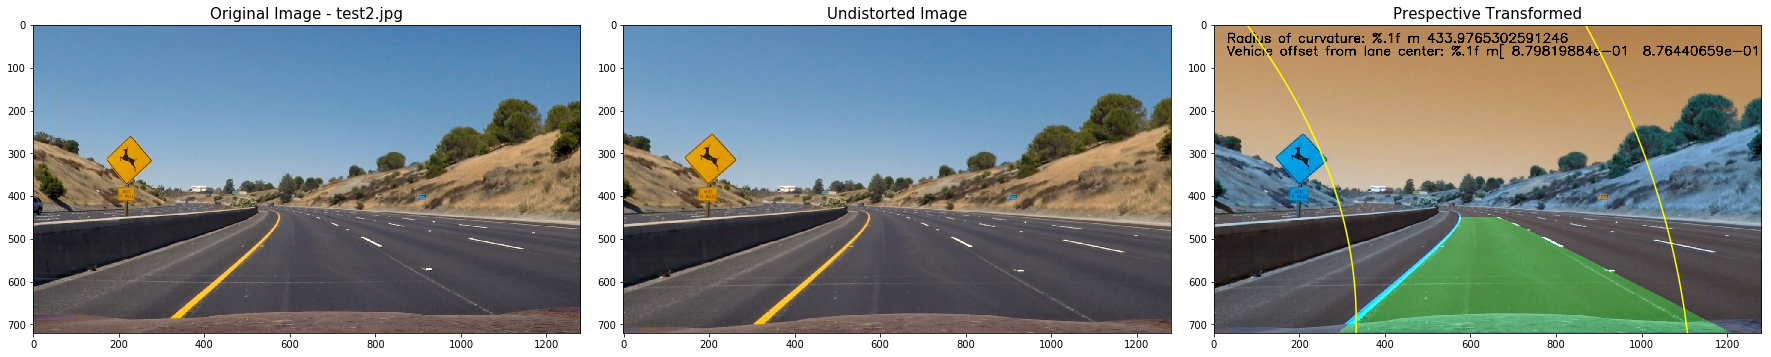

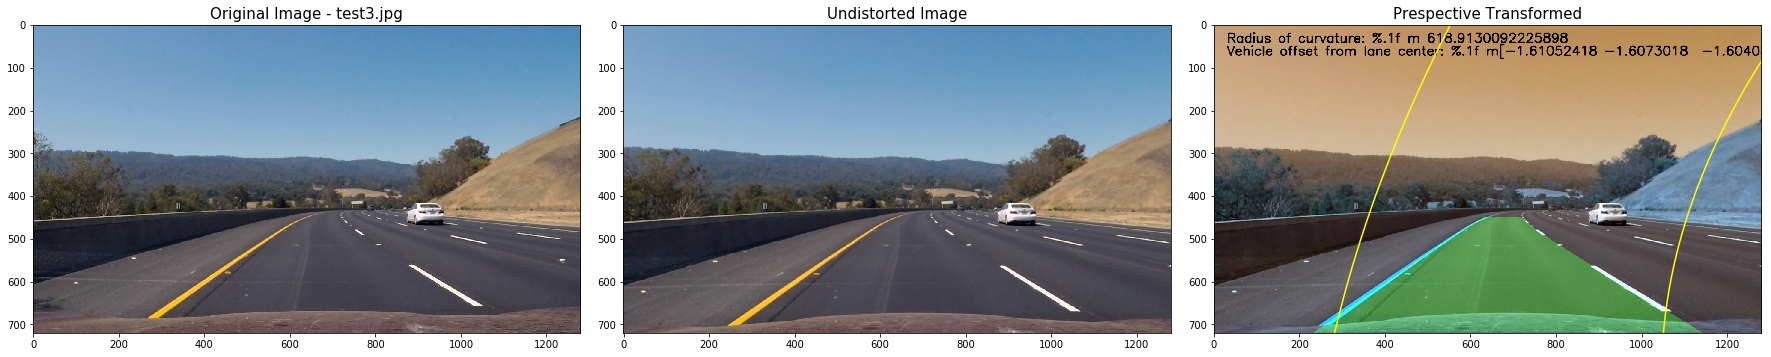

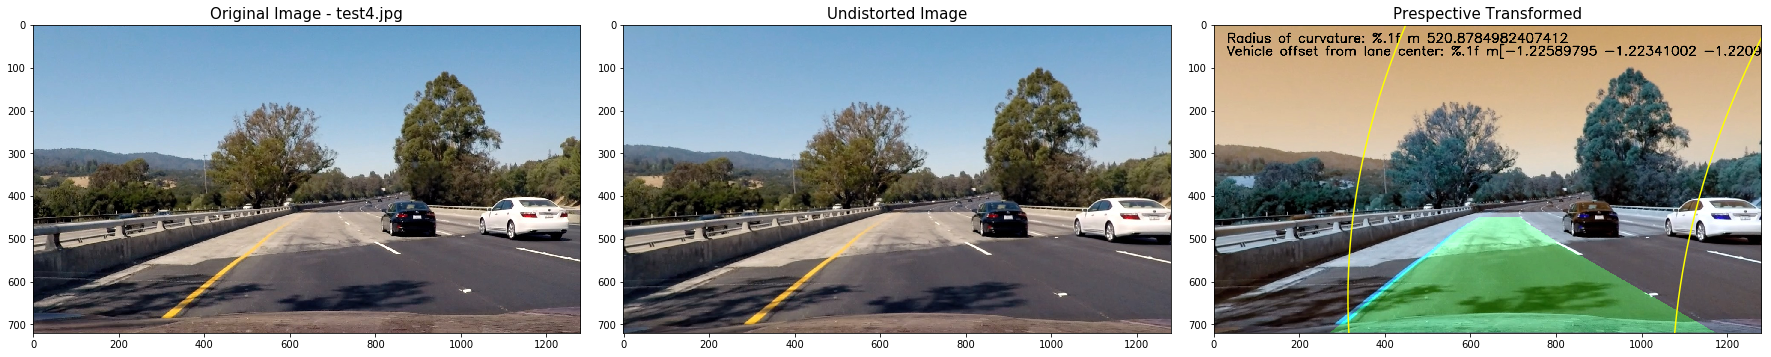

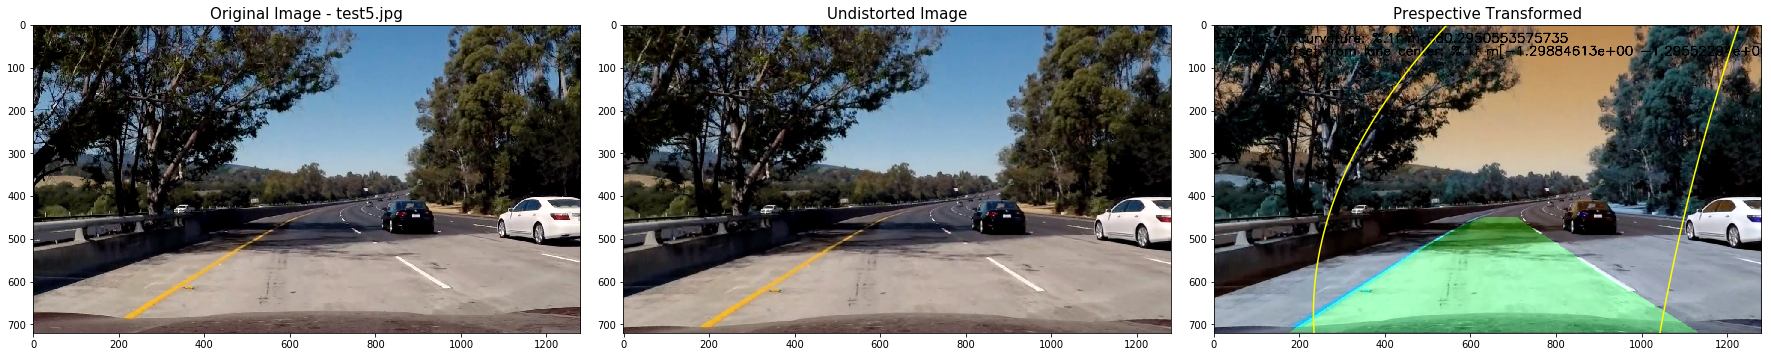

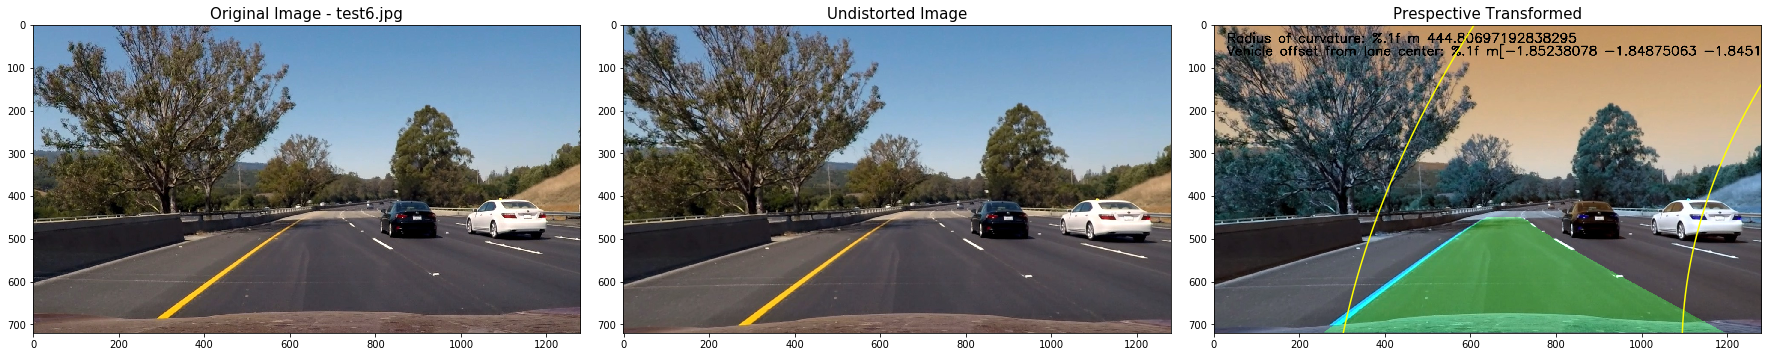

In [101]:
folder = "test_images/"
image_list = os.listdir(folder)
for i, image in enumerate(image_list):
    image_file = os.path.join(folder, image)
    img = cv2.imread(image_file)

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    undistorted = cal_undistort(img, objpoints, imgpoints)
    ax1.set_title('Original Image - '+ image, fontsize=15)
    ax2.imshow(cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB))
    ax2.set_title('Undistorted Image', fontsize=15)
    result_lab = channel_threshold_LAB(undistorted, (160,215))
    result_luv = channel_threshold_LUV(undistorted, (215,255))
    pipeline_output = np.zeros_like(result_lab)
    pipeline_output[(result_lab == 1) | (result_luv == 1)] = 1
    
    
    
    # Get perspective transform matrix and its inverse
    
    img_size = (pipeline_output.shape[1], pipeline_output.shape[0])
    warped_image, m_inv = transform_prespective(pipeline_output)
    #warped_image = cv2.polylines(warped_image, dst_points.astype('int32'), 1, (255,0,0), thickness=6)
    # Create histogram of image binary activations
    
    #
    out_img, left_curverad, right_curverad, offset, left_fit, right_fit  = fit_polynomial(warped_image)

    
    final_viz1 = final_viz(undistorted, left_fit, right_fit, m_inv, left_curverad, right_curverad, offset)
    
    
    #ax3.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    ax3.imshow(final_viz1, cmap = 'gray')
    ax3.set_title('Prespective Transformed', fontsize=15)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

AttributeError: 'tuple' object has no attribute 'shape'

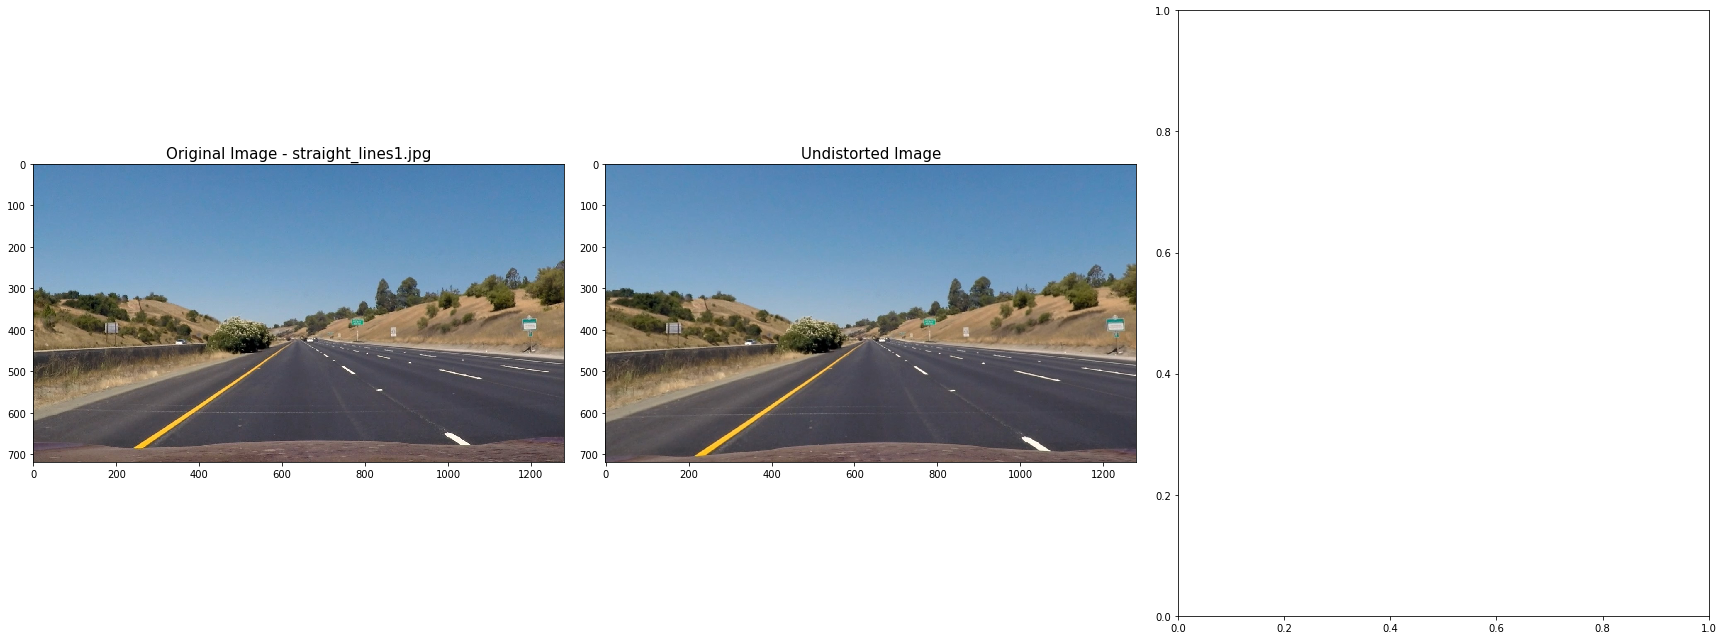

In [102]:
folder = "test_images/"
image_list = os.listdir(folder)
for i, image in enumerate(image_list):
    image_file = os.path.join(folder, image)
    img = cv2.imread(image_file)

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    undistorted = cal_undistort(img, objpoints, imgpoints)
    ax1.set_title('Original Image - '+ image, fontsize=15)
    ax2.imshow(cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB))
    ax2.set_title('Undistorted Image', fontsize=15)
    result_lab = channel_threshold_LAB(undistorted, (160,215))
    result_luv = channel_threshold_LUV(undistorted, (215,255))
    pipeline_output = np.zeros_like(result_lab)
    pipeline_output[(result_lab == 1) | (result_luv == 1)] = 1
    
    
    
    # Get perspective transform matrix and its inverse
    
    img_size = (pipeline_output.shape[1], pipeline_output.shape[0])
    warped_image = transform_prespective(pipeline_output)
    #warped_image = cv2.polylines(warped_image, dst_points.astype('int32'), 1, (255,0,0), thickness=6)
    # Create histogram of image binary activations
    
    
    out_img, left_curverad, right_curverad = fit_polynomial(warped_image)
    
    
    #ax3.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    ax3.imshow(out_img, cmap = 'gray')
    ax3.set_title('Prespective Transformed', fontsize=15)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)